In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from scipy.interpolate import lagrange

In [3]:
from scipy import interp

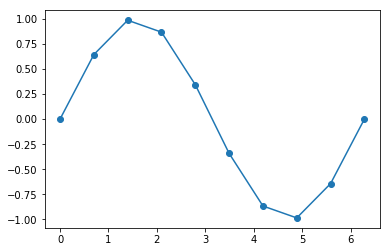

In [12]:
x = np.linspace(0,2*np.pi,10)

y = np.sin(x)

plt.plot(x,y,marker = 'o')

In [8]:
X = np.linspace(0,2*np.pi,40)

# 线性插值
Y = interp(X,x,y)

In [9]:
Y

array([ 0.00000000e+00,  1.48335602e-01,  2.96671204e-01,  4.45006807e-01,
        5.93342409e-01,  6.95406093e-01,  7.74333819e-01,  8.53261544e-01,
        9.32189269e-01,  9.75670649e-01,  9.48259338e-01,  9.20848027e-01,
        8.93436715e-01,  8.66025404e-01,  7.45101113e-01,  6.24176822e-01,
        5.03252531e-01,  3.82328240e-01,  2.36783176e-01,  7.89277254e-02,
       -7.89277254e-02, -2.36783176e-01, -3.82328240e-01, -5.03252531e-01,
       -6.24176822e-01, -7.45101113e-01, -8.66025404e-01, -8.93436715e-01,
       -9.20848027e-01, -9.48259338e-01, -9.75670649e-01, -9.32189269e-01,
       -8.53261544e-01, -7.74333819e-01, -6.95406093e-01, -5.93342409e-01,
       -4.45006807e-01, -2.96671204e-01, -1.48335602e-01, -2.44929360e-16])

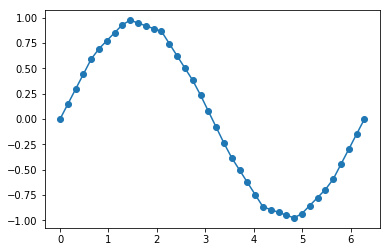

In [11]:
plt.plot(X,Y,marker = 'o')

In [13]:
import pandas as pd
from pandas import Series,DataFrame

In [36]:
# 饭店销售额，跟是否周六日有很大关系
sale = pd.read_excel('./catering_sale.xls')
sale

,日期,销量
0,2015-03-01,51.0
1,2015-02-28,2618.2
2,2015-02-27,2608.4
3,2015-02-26,2651.9
4,2015-02-25,3442.1
5,2015-02-24,3393.1
6,2015-02-23,3136.6
7,2015-02-22,3744.1
8,2015-02-21,6607.4
9,2015-02-20,4060.3


In [37]:
sale['销量'][(sale['销量'] < 400)|(sale['销量']>6000)] = np.NaN

D:\Anaconda3.5.2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
# s 数据 ，n这个位置，空数据
# k 向前5个，向后5个
def fill_lagrange(s,n,k=5):
    
    y = s[list(range(n-5,n)) + list(range(n+1,n+1+k))]
    y = y[y.notnull()]
    
    return lagrange(y.index,list(y))(n)

In [39]:
# i相当于列索引
for i in sale.columns:
#     j相当于行索引
    for j in range(sale[i].size):
        if sale[i].isnull()[j]:
#             使用拉格朗日进行填充
#             定义方法，进行填充
            sale[i][j] = fill_lagrange(sale[i],j)

D:\Anaconda3.5.2\lib\site-packages\pandas\core\series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]
D:\Anaconda3.5.2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [40]:
sale

,日期,销量
0,2015-03-01,-291.400000
1,2015-02-28,2618.200000
2,2015-02-27,2608.400000
3,2015-02-26,2651.900000
4,2015-02-25,3442.100000
5,2015-02-24,3393.100000
6,2015-02-23,3136.600000
7,2015-02-22,3744.100000
8,2015-02-21,4275.254762
9,2015-02-20,4060.300000
